In [260]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100 
mpl.rcParams['font.size'] = 7

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns 
from sklearn.feature_selection import f_classif, SelectKBest, chi2



df = pd.read_csv('clean_data.csv',sep=';')

In [261]:
df['default payment next month'].mean()

df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [262]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'another', 'high_school',
       'pos_graduate', 'university'],
      dtype='object')

In [263]:
logistic_regression = LogisticRegression(C=1, class_weight=None, dual=False,
fit_intercept=True,
intercept_scaling=1, max_iter=100, 
n_jobs=None, penalty='l2', random_state=None, solver='warn',
tol=0.0001, verbose=0, warm_start=False)

logistic_regression.C = 0.1
logistic_regression.solver = 'liblinear'



In [264]:
not_useful_colunms = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','ID','SEX','EDUCATION_CAT', 'EDUCATION']

useful_colunms = [colunm for colunm in df.columns if colunm not in not_useful_colunms ] # filtering useful columns

useful_cat = ['another',
 'high_school',
 'pos_graduate',
 'university',
 'MARRIAGE']

useful_cont = ['AGE','BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']


useful_colunms

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'another',
 'high_school',
 'pos_graduate',
 'university']

<Axes: >

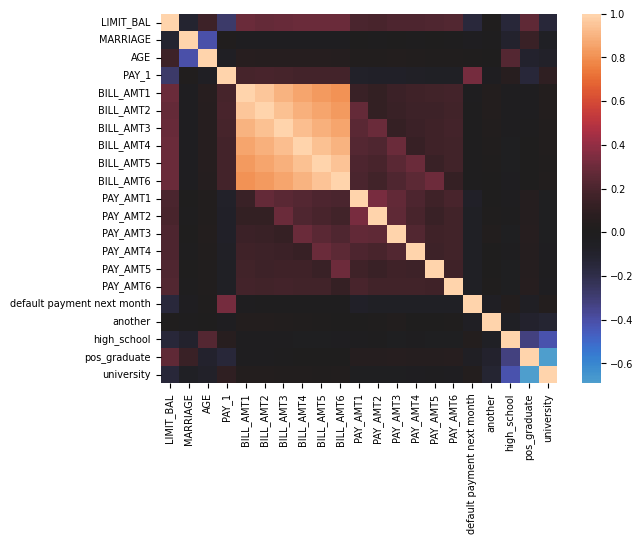

In [265]:
correlation_matrix = df[useful_colunms].corr() #correlation matrix of each for each colunms (pearson correlation (linear 1: + + -1: + -) Valid only for continous prediction)

# so this is not aplicable 

sns.heatmap(correlation_matrix,
xticklabels=correlation_matrix.columns.values,
yticklabels=correlation_matrix.columns.values,
center=0)


In [ ]:
# Test F for contiunous colunms

X_f = df[useful_cont].values  
y_f = df['default payment next month'].values  


f_stat, f_p_value = f_classif(X_f, y_f)


f_test_df = pd.DataFrame({
    'Feature': useful_cont,  
    'F statistic': f_stat,
    'p value': f_p_value
})


f_test_df_sorted = f_test_df.sort_values('p value')

print(f_test_df_sorted)

selector = SelectKBest(f_classif, k=1)  # Select the best (only one because of the colinerity)
X_selected = selector.fit_transform(X_f, y_f)

selected_indices = selector.get_support(indices=True)

selected_features = [useful_cont[i] for i in selected_indices]


print("Features (the best):")
print(selected_features)


      Feature  F statistic       p value
7    PAY_AMT1   140.612679  2.358354e-32
8    PAY_AMT2   101.408321  8.256124e-24
9    PAY_AMT3    90.023873  2.542641e-21
11   PAY_AMT5    85.843295  2.090120e-20
12   PAY_AMT6    80.420784  3.219565e-19
10   PAY_AMT4    79.640021  4.774112e-19
1   BILL_AMT1    11.218406  8.110226e-04
3   BILL_AMT3     5.722938  1.675157e-02
2   BILL_AMT2     5.668454  1.727965e-02
0         AGE     5.479140  1.925206e-02
4   BILL_AMT4     3.434740  6.384965e-02
5   BILL_AMT5     1.216082  2.701409e-01
6   BILL_AMT6     1.049561  3.056176e-01
Features (the best):
[]


c:\Users\sousa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


In [267]:
# Test Chi^2 for categorical columns

X_chi = df[useful_cat].values  
y_chi = df['default payment next month'].values 


chi_scores, p_values = chi2(X_chi, y_chi)

chi_test_df = pd.DataFrame({
    'Feature': useful_cat,
    'Chi-Square Score': chi_scores,
    'P-Value': p_values
})

chi_test_df_sorted = chi_test_df.sort_values('Chi-Square Score', ascending=False)

print(chi_test_df_sorted)


selector = SelectKBest(chi2, k=3)
X_selected_chi = selector.fit_transform(X_chi, y_chi)

selected_indices_chi = selector.get_support(indices=True)

selected_features_chi = [useful_cat[i] for i in selected_indices_chi]

print("\nFeatures (2 best):")
print(selected_features_chi)

        Feature  Chi-Square Score       P-Value
0       another         51.772753  6.231055e-13
2  pos_graduate         42.433615  7.312243e-11
1   high_school         28.789098  8.070412e-08
3    university         14.381071  1.492956e-04
4      MARRIAGE          3.157193  7.559304e-02

Features (2 best):
['another', 'high_school', 'pos_graduate']


In [268]:


# Separate the data independent variables (X) and target (y)
# X = df.drop(columns=['default payment next month', 'EDUCATION_CAT','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'ID'])  # all columns except target
y = df['default payment next month']  # target
X = df[selected_features + selected_features_chi + ['PAY_1']]


# split the data with stratify -> train and test has the same distribution avoiding unbalances
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=24, 
    stratify=y
)


print(X_train.shape)
print(X_test.shape)


(21331, 4)
(5333, 4)


In [269]:
logistic_regression.fit(X=X_train, y=y_train)

print(logistic_regression.coef_)

y_pred = logistic_regression.predict(X_test)



[[-0.99766657  0.11369096 -0.01394493  0.72724118]]


In [270]:


# accuracy of the results 
print(metrics.accuracy_score(y_pred= y_pred, y_true= y_test))

metrics.confusion_matrix(y_pred= y_pred, y_true= y_test)

# TN: true negative  FP: false positive
# FN: false negative TP: true positive

# recall = true positives / positives (true positives + false negatives) (how many true positives between all the true positives)
# precision = true positves / (false positives + true positives) (how many true positives between all classified positive)

0.8220513782111382


array([[3985,  165],
       [ 784,  399]])

0.7013033028139608


Text(0.5, 1.0, 'ROC curve')

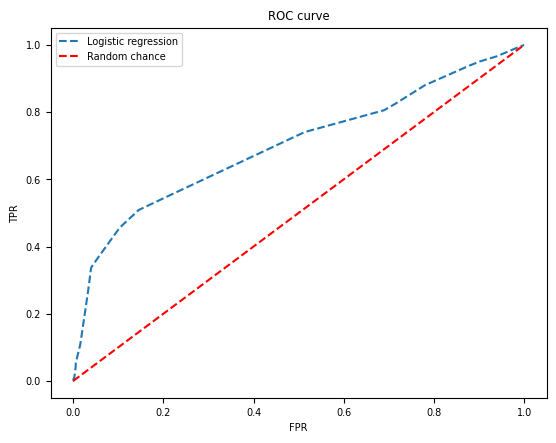

In [271]:
y_prob_pred =  logistic_regression.predict_proba(X_test)  #y_prob_pred[0] = prob of negative, [1] = prob of positive
pos_prob = y_prob_pred[:,1] # only the prob of the positive

# default threshold equal 0,5, so if the prob is equal or bigger than 0,5 is positive


fpr, tpr, thresholds1 = metrics.roc_curve( y_test ,pos_prob) # finding a good threshold

print(metrics.roc_auc_score(y_test, pos_prob))


plt.plot(fpr, tpr, '--')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


0.48281866940837986


(0.0, 1.0)

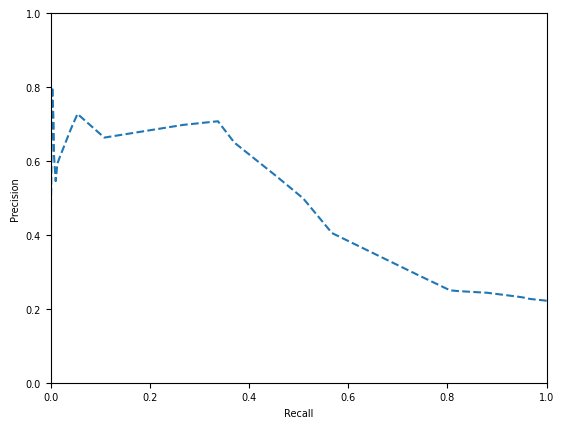

In [272]:
precision, recall, thresholds2 = metrics.precision_recall_curve(y_test, pos_prob)

print(metrics.auc(recall, precision))

plt.plot(recall, precision, '--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])